model initialized with norm initialization
model initialized with norm initialization
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Sep/2022 22:50:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 22:50:04] "GET /favicon.ico HTTP/1.1" 404 -


 * Running on http://3669-2003-e4-3f23-fd24-1919-731a-a6a2-6347.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


C:\Users\ahmad\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


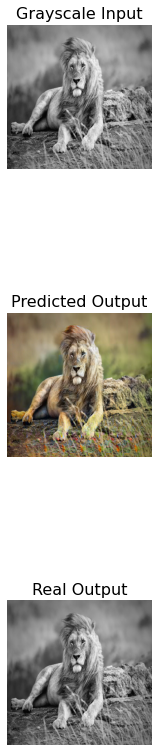

127.0.0.1 - - [01/Sep/2022 22:50:15] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 22:50:15] "GET /display/mighty-beautiful-lion-resting-african-savannah-black-white-kenya-96042281.jpg HTTP/1.1" 301 -
127.0.0.1 - - [01/Sep/2022 22:50:15] "GET /static/generated/mighty-beautiful-lion-resting-african-savannah-black-white-kenya-96042281.jpg HTTP/1.1" 200 -
C:\Users\ahmad\anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 6 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


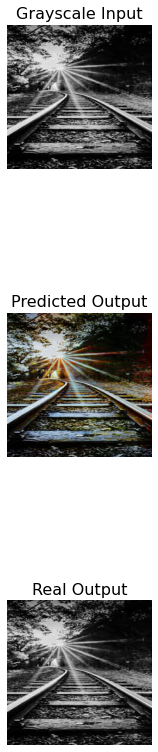

127.0.0.1 - - [01/Sep/2022 22:52:34] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 22:52:35] "GET /display/images.jfif HTTP/1.1" 301 -
127.0.0.1 - - [01/Sep/2022 22:52:35] "GET /static/generated/images.jfif HTTP/1.1" 200 -


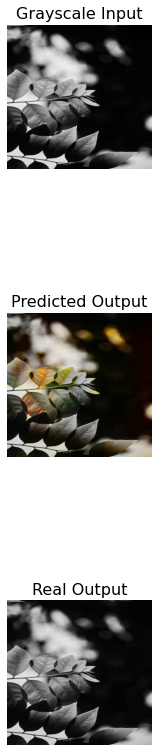

127.0.0.1 - - [01/Sep/2022 22:52:52] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 22:52:52] "GET /display/photo-1621514742312-0b6d1509194f.jfif HTTP/1.1" 301 -
127.0.0.1 - - [01/Sep/2022 22:52:52] "GET /static/generated/photo-1621514742312-0b6d1509194f.jfif HTTP/1.1" 200 -


In [ ]:
from flask import Flask, render_template, request, redirect, flash, url_for
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename

import  torch_utils 
import torch
import os
import glob
import tqdm 
import time 

UPLOAD_FOLDER = 'static/images/'

app = Flask(__name__)
run_with_ngrok(app)

app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.secret_key = "secret key"

model = torch_utils.MainModel()
checkpoint = torch.load('../app/my_model5.pt',map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])

      

@app.route('/')
def index():
    return render_template('index.html')



@app.route('/', methods=['POST'])
def upload_image():
    if request.method == 'POST':
        if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
        file = request.files['file']
        if file.filename == '':
            flash('No file selected for uploading')
            return redirect(request.url)
        if file:
            filename = secure_filename(file.filename)
            file.save(os.path.join(app.config['UPLOAD_FOLDER'],filename))
            flash('Image successfully uploaded')
            img_path = glob.glob('static/images/' + filename)
            data = torch_utils.make_dataloaders(10,paths=img_path,split='val')
            dataset = next(iter(data))
            predection = torch_utils.visualize(model,dataset,True)
            # flash(filename)
            return render_template("index.html",filename=filename)
    
         
        
@app.route('/display/<filename>')
def display(filename):
    # print('display_image filename: ' + filename)
    os.rename('static/generated/color.jpg', 'static/generated/'+ filename)
    return redirect(url_for('static', filename='generated/' + filename), code=301)




if __name__ == '__main__':
    app.run()         